<a href="https://colab.research.google.com/github/Davade987/Deteccion-de-caracterisricas-en-una-imagen/blob/main/Comparativa_de_t%C3%A9cnicas_de_detecci%C3%B3n_de_caracter%C3%ADsticas_en_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparativa de técnicas de detección de características en imágenes

| Nombre        | Tipo              | Descripción técnica                                                                                   | Ventajas                                                        | Desventajas                                                       | Uso Típico                                      |
|---------------|-------------------|--------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|--------------------------------------------------------------------|-------------------------------------------------|
| **Canny**      | Bordes            | Algoritmo multietapa (suavizado, gradiente, supresión no-máximos, histéresis)                         | Alta precisión, bordes definidos, supresión de ruido            | Sensible a parámetros, más lento                                    | Segmentación precisa, visión artificial         |
| **Sobel**      | Bordes            | Convolución con máscaras 3x3 para derivadas en X e Y                                                   | Rápido, resalta bordes horizontales y verticales                | Bordes gruesos, poca precisión en esquinas                          | Preprocesamiento, entornos con bajo ruido       |
| **Scharr**     | Bordes            | Variante mejorada del Sobel con mayor precisión angular                                                | Más preciso que Sobel, buena isotropía                          | Más costoso computacionalmente                                      | Análisis de bordes más finos                    |
| **Laplace**    | Bordes            | Derivada de segundo orden. Detecta zonas de cambio brusco de intensidad                               | Detecta bordes sin dirección preferida                          | Produce bordes dobles, muy sensible al ruido                        | Resaltado general de bordes                     |
| **Prewitt**    | Bordes            | Similar a Sobel pero con máscaras más simples                                                          | Muy rápido y fácil de implementar                               | Menos preciso, más afectado por el ruido                            | Aplicaciones en tiempo real                     |
| **Roberts**    | Bordes            | Filtros de 2x2 que estiman gradientes diagonales                                                       | Extremadamente rápido                                           | Muy sensible al ruido, resultados inestables                        | Sistemas embebidos, imágenes simples            |
| **Harris**     | Esquinas          | Detecta esquinas midiendo el cambio de intensidad en todas las direcciones                            | Detecta muchas esquinas, fácil de implementar                   | No invariante a escala, sensible a rotación                         | Detección de patrones estructurales             |
| **Shi-Tomasi** | Esquinas          | Mejora de Harris usando mínimo valor propio para selección de esquinas                                | Más estable que Harris, selecciona puntos más fuertes           | Detecta menos esquinas                                               | Seguimiento de movimiento, tracking             |
| **FAST**       | Esquinas / Keypoints | "Features from Accelerated Segment Test", compara pixeles en círculo                                 | Muy rápido, ideal para tiempo real                              | No es invariante a escala ni rotación                               | Sistemas embebidos, visión móvil                |
| **ORB**        | Keypoints         | Mezcla de FAST para detección + BRIEF para descripción, libre de patentes                              | Rápido, resistente a rotación, eficiente                         | Menos preciso que SIFT o SURF                                       | SLAM, AR, reconocimiento en tiempo real         |
| **SIFT**       | Keypoints         | Escala y orientación invariantes, detecta y describe puntos clave con precisión                        | Muy robusto a cambios de escala e iluminación                   | Muy costoso, estaba bajo patente (ahora libre)                      | Reconocimiento de objetos, emparejamiento       |
| **SURF**       | Keypoints         | Similar a SIFT pero más rápido usando integrales y Haar                                                | Más rápido que SIFT, buena robustez                             | Requiere licencia en algunas implementaciones                       | Visión industrial, matching rápido              |
| **LBP**        | Textura           | "Local Binary Patterns", codifica la textura de una región como un patrón binario                     | Rápido, efectivo en análisis de texturas                        | No es robusto a ruido o iluminación variable                        | Reconocimiento facial, clasificación de texturas|
| **Gabor**      | Textura           | Filtro convolucional con frecuencia y orientación específicas                                          | Excelente para detección de texturas orientadas                 | Costoso computacionalmente                                          | Segmentación, análisis de textura               |
| **Haralick**   | Textura           | Extrae estadísticas de matrices de co-ocurrencia de niveles de gris (GLCM)                            | Rico en características texturales                              | Requiere imágenes bien preprocesadas                                | Clasificación de texturas, biometría            |
| **CENSURE**    | Keypoints         | Invariante a escala y rotación, se basa en bordes centrados circulares                                | Preciso y robusto                                               | Menos conocido, menos soporte                                       | Aplicaciones de visión en dispositivos móviles  |



Opciones para cargar imagen:
1. Cargar desde URL
2. Subir archivo local
Selecciona opción (1 o 2): 1
Introduce la URL de la imagen: https://imgs.search.brave.com/2ntTIlA_C18rr6X48K2zsfX8LbdJk3Je-trtqW5Y7Dk/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTk4/NzYzMDE1NC9lcy9m/b3RvL3VuYS1jYXNh/LWRlLWx1am8tZW4t/YmxhbmNvLXktbmVn/cm8tY29uLXVuYS1w/dWVzdGEtZGUtc29s/LmpwZz9zPTYxMng2/MTImdz0wJms9MjAm/Yz1UUUdHN2FESmN3/bVl3ZUlBNmtCMUpf/MzJjLWtuWVppYVRG/QVRoU0huay1ZPQ
Imagen cargada desde URL correctamente.


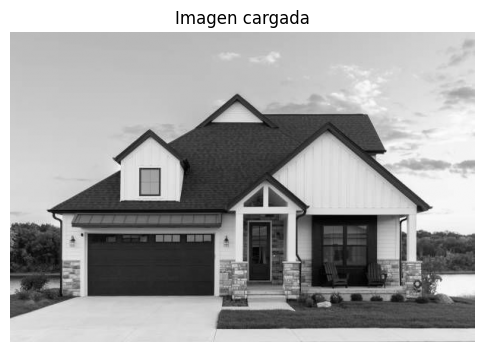

In [21]:
# --- Instalaciones necesarias ---
!pip install -q mahotas scikit-image opencv-python pillow

# --- Importaciones ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

# Para subir archivo en Colab
try:
    from google.colab import files
    colab = True
except ImportError:
    colab = False

def cargar_imagen_url(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('L')  # Escala de grises
        image = np.array(img)
        print("Imagen cargada desde URL correctamente.")
        return image
    except Exception as e:
        print(f"Error cargando la imagen desde URL: {e}")
        return None

def cargar_imagen_local():
    if colab:
        uploaded = files.upload()
        if not uploaded:
            print("No se subió ningún archivo.")
            return None
        filename = list(uploaded.keys())[0]
        print(f"Archivo subido: {filename}")
        image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print("Error leyendo la imagen subida. Verifica que sea un archivo válido.")
        return image
    else:
        path = input("Introduce la ruta completa de la imagen local: ")
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print("No se pudo cargar la imagen. Verifica la ruta y el archivo.")
        return image

# --- Elección del método para cargar imagen ---
print("Opciones para cargar imagen:")
print("1. Cargar desde URL")
print("2. Subir archivo local")

opcion = input("Selecciona opción (1 o 2): ")

if opcion == '1':
    url = input("Introduce la URL de la imagen: ")
    image = cargar_imagen_url(url)
elif opcion == '2':
    image = cargar_imagen_local()
else:
    print("Opción no válida.")
    image = None

# --- Mostrar imagen si se cargó correctamente ---
if image is not None:
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.title("Imagen cargada")
    plt.axis('off')
    plt.show()
else:
    print("No se pudo cargar ninguna imagen.")


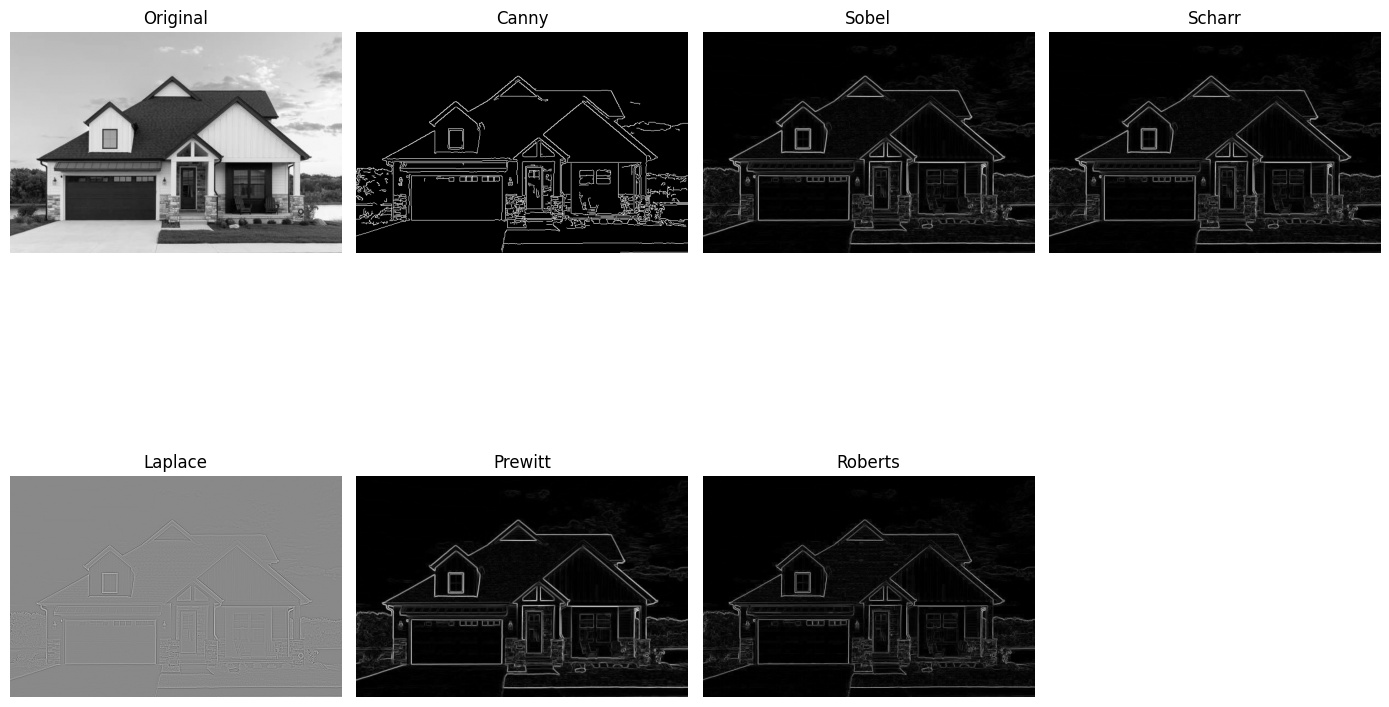

In [22]:
# Aplicamos diferentes filtros para detectar bordes en la imagen

# Sobel: calcula gradientes horizontal y vertical
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobel = np.sqrt(sobelx**2 + sobely**2)

# Scharr: versión optimizada de Sobel para mejor respuesta angular
scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr = np.sqrt(scharrx**2 + scharry**2)

# Laplace: segunda derivada, detecta bordes finos, sensible a ruido
laplace = cv2.Laplacian(image, cv2.CV_64F)

# Canny: algoritmo avanzado que produce bordes delgados y limpios
canny = cv2.Canny(image, 100, 200)

# Prewitt: similar a Sobel, usa filtros horizontales y verticales simples
prewitt_x = filters.prewitt_h(image)
prewitt_y = filters.prewitt_v(image)
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Roberts: detector rápido con kernels 2x2, sensible a ruido
roberts = filters.roberts(image)

# Visualización comparativa
titles = ['Original', 'Canny', 'Sobel', 'Scharr', 'Laplace', 'Prewitt', 'Roberts']
images = [image, canny, sobel, scharr, laplace, prewitt, roberts]

plt.figure(figsize=(14,10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


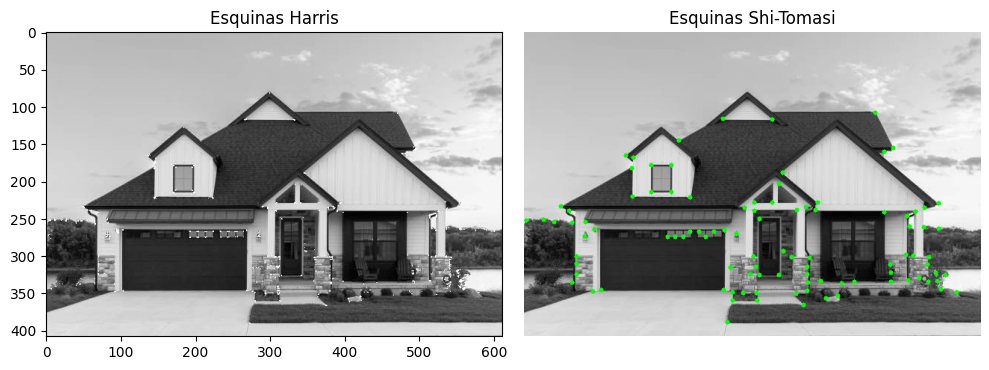

In [23]:
# Filtros de deteccion de esquinas
# Harris: método clásico para detectar esquinas basándose en matriz de autocorrelación
harris = cv2.cornerHarris(np.float32(image), blockSize=2, ksize=3, k=0.04)
image_harris = image.copy()
# Marcamos las esquinas en blanco (255) donde el valor Harris es alto
image_harris[harris > 0.01 * harris.max()] = 255

# Shi-Tomasi: mejora de Harris, selecciona esquinas más fiables
corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(shi, (int(x), int(y)), 3, (0, 255, 0), -1)

# Mostrar resultados lado a lado
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(image_harris, cmap='gray'), plt.title("Esquinas Harris")
plt.subplot(1, 2, 2), plt.imshow(shi), plt.title("Esquinas Shi-Tomasi")
plt.axis('off')
plt.tight_layout()
plt.show()


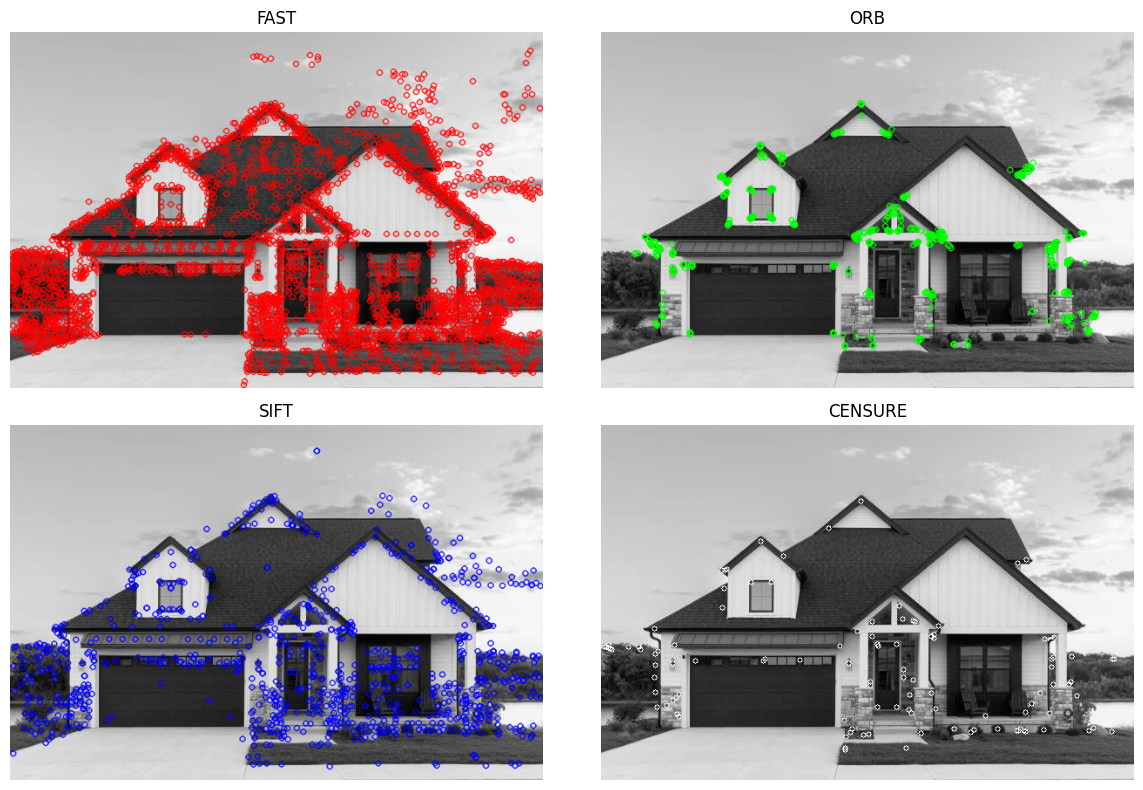

In [24]:
# Filtros de Keypoints y descriptores
# FAST: detector rápido basado en comparación de intensidades en círculo alrededor de un pixel
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(image, None)
img_fast = cv2.drawKeypoints(image, kp_fast, None, color=(255, 0, 0))

# ORB: combina FAST + BRIEF, es rápido y robusto (rotación e invariancia)
orb = cv2.ORB_create()
kp_orb, des_orb = orb.detectAndCompute(image, None)
img_orb = cv2.drawKeypoints(image, kp_orb, None, color=(0, 255, 0))

# SIFT: detecta puntos extremos y genera descriptores robustos (requiere contrib)
sift = cv2.SIFT_create()
kp_sift, des_sift = sift.detectAndCompute(image, None)
img_sift = cv2.drawKeypoints(image, kp_sift, None, color=(0, 0, 255))

# CENSURE: detector basado en contornos circulares (usando skimage)
from skimage.feature import CENSURE
censure = CENSURE()
censure.detect(image)
img_censure = image.copy()
for y, x in zip(censure.keypoints[:,0], censure.keypoints[:,1]):
    cv2.circle(img_censure, (int(x), int(y)), 3, 255, 1)

# Mostrar keypoints
titles = ['FAST', 'ORB', 'SIFT', 'CENSURE']
imgs = [img_fast, img_orb, img_sift, img_censure]

plt.figure(figsize=(12,8))
for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


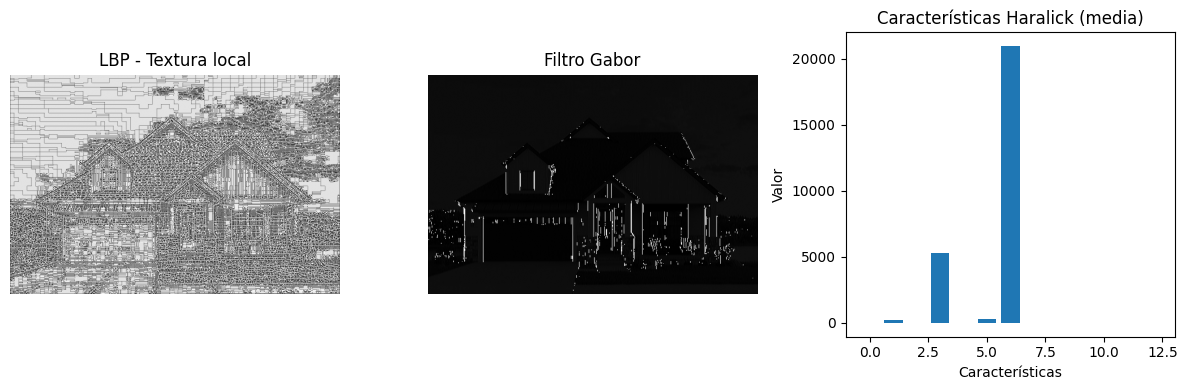

In [25]:
# Filtros de texturas
# LBP (Local Binary Pattern): codifica textura comparando píxel con sus vecinos
lbp = local_binary_pattern(image, P=8, R=1, method='uniform')

# Filtro de Gabor: responde a texturas con frecuencia y orientación específicas
gabor_filtered, _ = gabor(image, frequency=0.6)

# Haralick: características estadísticas extraídas de la matriz de co-ocurrencia
haralick_features = haralick(image)
har_mean = haralick_features.mean(axis=0)

# Visualización
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(lbp, cmap='gray')
plt.title("LBP - Textura local")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gabor_filtered, cmap='gray')
plt.title("Filtro Gabor")
plt.axis('off')

plt.subplot(1,3,3)
plt.bar(range(len(har_mean)), har_mean)
plt.title("Características Haralick (media)")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()
